# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Liying Ma

**ID**: Lm698

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [32]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE4750/hws/hw1-LM698`


InterruptException: InterruptException:

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [33]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [34]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [35]:
function minimum(array)
    min_value = 0 
    for i in 1:length(array)
        if array[i] < min_value # Error: When every values in the array is 
                                #greater than 0, the returning minimum 
                                #value would be 0.
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


In [36]:
# Fixed Version

function minimum(array)
    min_value = array[1] # Assume and use the first value in the array 
                        #to be the minimum value
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [37]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades) # Error: There is no mean() method
  return average_grade
end

@show average_grade; # Error: avaergae_grade is a local variable defined 
                      #in the function, therefore it is not defined outside 
                      #of the function

UndefVarError: UndefVarError: `average_grade` not defined

In [38]:
# Fixed Version
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  total_grade = 0 # Since the orginal mean function was not defined, I set 
                    #a total grade initially equals to 0
  for i in 1:length(grades)
    total_grade += grades[i] # Sum up the grades
  end
  average_grade = total_grade / length(grades) # Find the average using the 
                                                #total grade divide by the 
                                                #number of items in the grade 
                                                #array(number of students)
  return average_grade
end

average = class_average(student_grades) # Call the functioin
@show average;

average = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [39]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials) # Error: Method name is zeros(), not zero()
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11) # Error: The boolean expression 
                                            #returns true, not 1 therefore there 
                                            #is type mismatch error
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

In [40]:
# Fixed Version
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1_000
outcomes = zeros(n_trials)
for i in 1:n_trials
    if sum(passadieci()) > 11
    outcomes[i] = 1 # Manually set the boolean expression to 1 to count 
                    #it as a winning number
    else
    outcomes[i] = 0 # Doesn't count lose games
    end
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [41]:
function mystery_function(values) 
"Create a new array that collects each unique values in
array('values') by the order of their first appearance"
    y = [] # Create an empty array
    for v in values
        if !(v in y) # Check if v is not counted (v not appear in y)
            append!(y, v) # Append v in new array y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.


In [42]:
# There is a built-in Jualia function called unique() that 
#does the same thing as mystery_function (Reference 1)
function not_mystery_function(values)
    y = unique(values)
    return y
end

list_of_values_1 = [1, 2, 3, 4, 3, 4, 2, 1]
@show not_mystery_function(list_of_values_1);

not_mystery_function(list_of_values_1) = [1, 2, 3, 4]


### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

In [47]:
function compute_mean(v)
    sum = 0 # Set the sum to zero
    for i in length(v)
        sum += v[i] # Sum up each values in v
    end
    mean = sum/length(v) # Calculate the mean
    return mean
end

random_vect = rand(1,10) # Create a random vector of length 10
mean = compute_mean(random_vect) # Compute its mean
@show random_vect;
@show mean

# Using function broadcast to subtract 
#the mean from the random vector, and 
#create a new vector
new_vect = broadcast(-,random_vect,mean) 
# Compute the mean of new vector,
#using round()  to ensure that any small
#floating-point  imprecision will not
#affect the output
new_mean = round(compute_mean(new_vect)) 
@show new_vect; 
@show new_mean;

random_vect = [0.32033279680936155 0.5625431069729315 0.24290210101484921 0.48465052392296226 0.875224007279965 0.735648764593857 0.12039698904613172 0.5200644852995037 0.9549086874901707 0.5470903952583398]
mean = 0.05470903952583398
new_vect = [0.26562375728352755 0.5078340674470976 0.18819306148901524 0.42994148439712826 0.820514967754131 0.680939725068023 0.06568794952029774 0.46535544577366966 0.9001996479643367 0.4923813557325058]
new_mean = 0.0


### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005 X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

### Answer:

Land treatment:

Based on the context, 20% of the YUK substance will be drain into Pristine Brook. Given $X_1$ is the amount of wastewater disposed of on the land, in $\text{m}^3\text{/day}$. Therefore, the amount of YUK substance will be discharged to Pristine Brook can be written as 

$X_1 * C_{YUK} * 0.2$           (Eq.1), 

where $C_{YUK}$ is the concentration of YUK in the wastewater.

And the cost of land disposal is given that 

$X_1^2/20$          (Eq.2)

Chem treatment:

Based on the context, "the chemical treatment has an efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of wastewater ($\text{m}^3\text{/day}$) treated." In other words, the amount of YUK that will be drain into Pristine Brook can be written as 

$(1-e)*X_2*C_{YUK}$         (Eq.3)

can be simplified as $0.005*X_2^2*C_{YUK}$         (Eq.3.1)

And the cist of chemical treatment is given that $1.5 \text{ dollars}{/m^3}$ of wastewater treated, which can be written as 

$1.5*X_2$           (Eq.4)

Direct disposal:

The amount of YUK substance can be written as
$X_3 * C_{YUK}$         (Eq. 5),

where $X_3$ is the quantity of wastewater ($\text{m}^3\text{/day}$) discharged directly to the Pristine Brook.

And the cost is $0 \text{dollars}$.

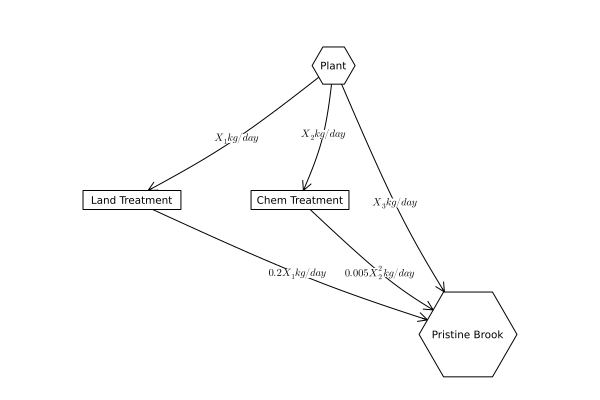

In [44]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
"Since the YUK concentration in the wastewater  is 1 kg/m^3, 
#I will use X_1, X_2, and X_3 as the amount of  YUK substance"

edge_labels = Dict((1, 2) => L"X_1 kg/day",
                    (1,3) => L"X_2 kg/day",
                    (1, 4) => L"X_3 kg/day",
                    (2, 4) => L"0.2X_1 kg/day", # Eq.1
                    (3, 4) => L"0.005X_2^2 kg/day") # Simplified Eq. 3
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

In [45]:
# Constants
Q_waste = 100 #m^3/day
C_YUK = 1 #kg/m^3
Upper_lim = 20 #kg/day

function land_treatment(x1)
    "A function that calculates the amount of YUK will be 
    discharged to Pristine Brook, and the cost of the 
    land treatment plan"
    return (x1*C_YUK*0.2, (x1^2)/20) # Please refer to Eq. 1 & Eq. 2
end

yuk_land, cost_land = land_treatment(Q_waste)
@show yuk_land;
@show cost_land;

function chem_treatment(x2)
    "A function that calculates the amount of YUK will be 
    discharged to Pristine Brook, and the cost of the 
    chemical treatment plan"
    return (x2*C_YUK*(1-(1-0.005*x2)), 1.5*x2) # Please refer to Eq. 3 & Eq.4
end

yuk_chem, cost_chem = chem_treatment(Q_waste)
@show yuk_chem;
@show cost_chem;

function direct_discharge(x3)
    "A function that calculates the amount of YUK will be 
    discharged to directly to the Pristine Brook, and the cost of
    the plan"
    return (x3*C_YUK, 0) # Please refer to Eq. 5
end 

yuk_dire, cost_dire = direct_discharge(Q_waste)
@show yuk_dire;
@show cost_dire;

yuk_land = 20.0
cost_land = 500.0
yuk_chem = 50.0
cost_chem = 150.0
yuk_dire = 100
cost_dire = 0


best = Any[(60, 40, 0, 20.0, 240.0), (65, 35, 0, 19.125, 263.75), (70, 30, 0, 18.5, 290.0), (75, 25, 0, 18.125, 318.75), (80, 20, 0, 18.0, 350.0), (85, 15, 0, 18.125, 383.75), (90, 10, 0, 18.5, 420.0), (95, 5, 0, 19.125, 458.75), (100, 0, 0, 20.0, 500.0)]


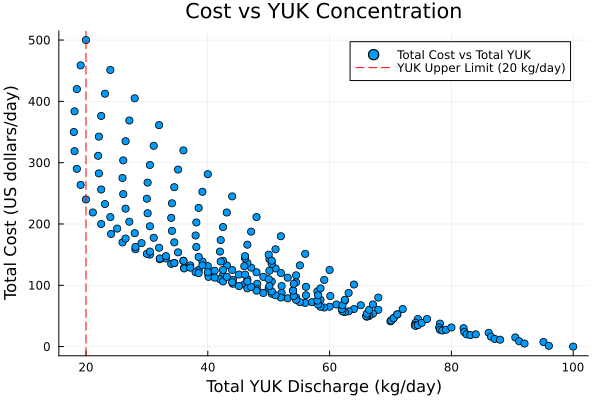

In [46]:
# Experiment with different combinations

# Create a range of values from 0 to 100
#(the given wastewater discharging rate) with step size 5
x1_values = 0:5:100 
# Array that store the combinations that meet the standard
best = [] 
# Array that store all the combinations
results = [] 

for x1 in x1_values
    # Since the wastewater discharging rate is 100, set up the combinations
    for x2 in 0:5:(100 - x1)
        x3 = 100 - (x1+x2)
        # Plan calculations
        yuk_land, cost_land = land_treatment(x1)
        yuk_chem, cost_chem = chem_treatment(x2)
        yuk_dire, cost_dire = direct_discharge(x3)
        total_yuk = yuk_land + yuk_chem + yuk_dire
        total_cost = cost_land + cost_chem + cost_dire
        # Store the results
        push!(results,(x1, x2, x3, round(total_yuk, digits = 2), total_cost))

        # Find the total amount of YUK substance that meets the standard
        if total_yuk <= Upper_lim 
            # Store the results to 'best' array
            push!(best,(x1, x2, x3, total_yuk, total_cost))
        end
    end
end

# Extract total YUK discharge and the total cost from result
total_yuk = [r[4] for r in results]
total_cost = [r[5] for r in results]

#@show results;
#@show total_yuk;
#@show total_cost;
@show best;

# Plot Total Cost vs Total YUK discharge
p = scatter(total_yuk, total_cost, label="Total Cost vs Total YUK", 
xlabel="Total YUK Discharge (kg/day)", ylabel="Total Cost (US dollars/day)", 
title="Cost vs YUK Concentration", legend=:topright)

# Add the Upper Limit line for YUK discharge (y=20)
vline!([Upper_lim], label="YUK Upper Limit (20 kg/day)", linestyle=:dash, color=:red)

According to the result, one of the combinations that meets the standard is split $70 \text{m}^3\text{/day}$ of wastewater to the land treatment, $30 \text{m}^3\text{/day}$ of wastewater to the chemical treatment and $0 \text{m}^3\text{/day}$ of wastewater directly to the Pristine Brook. The YUK concentration after the process is $18.5 \text{kg}\text{/day}$. The cost of this combination is $290 \text{dollars}\text{/day}$.
Based on the plot, we can see that in order to get lower YUK concentration, we need spend more money.

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

Reference 1: Question 2, the unique() method
(#https://discourse.julialang.org/t/how-can-write-a-function-to-find-unique-elements-in-array-without-any-allocation/34005)

Reference 2: Question 3, broadcast() method
(#https://www.geeksforgeeks.org/broadcasting-across-arrays-in-julia/)

Rederence 3: Question 4, plotting vertical line
(#https://discourse.julialang.org/t/how-to-specify-the-span-of-hline-in-plots-jl/59539)

Credit to Arron Chang for giving me ideas of more combinations of the treatment plans.